In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


def load_data():
    url = 'https://raw.githubusercontent.com/rfordatascience/' + \
    'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
    df = pd.read_csv(url)
    df_interim = df.copy()
    df_interim = df_interim[['total_cup_points',
                                'species',
                                'country_of_origin',
                                'variety',
                                'aroma',
                                'aftertaste',
                                'acidity',
                                'body',
                                'balance',
                                'altitude_mean_meters',
                                "moisture"]]
    df_interim = df_interim.dropna()
    df_interim["species"] = pd.Categorical(df_interim["species"])
    df_interim["country_of_origin"] = pd.Categorical(df_interim["country_of_origin"])
    df_interim["variety"] = pd.Categorical(df_interim["variety"])
    df_interim["specialty"] = df_interim["total_cup_points"].apply(lambda x: "yes" if x > 82.43 else "no")
    df_interim["specialty"] = pd.Categorical(df_interim["specialty"])
    df_interim["altitude_mean_meters"] = df_interim["altitude_mean_meters"].apply(lambda x: 1300 if x > 10000 else x)
    df_interim = df_interim[df_interim["acidity"]!=0].copy()
    df = df_interim.copy()
    return df
    
df_ch = load_data()

In [29]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 1 to 1333
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      996 non-null    float64 
 1   species               996 non-null    category
 2   country_of_origin     996 non-null    category
 3   variety               996 non-null    category
 4   aroma                 996 non-null    float64 
 5   aftertaste            996 non-null    float64 
 6   acidity               996 non-null    float64 
 7   body                  996 non-null    float64 
 8   balance               996 non-null    float64 
 9   altitude_mean_meters  996 non-null    float64 
 10  moisture              996 non-null    float64 
 11  specialty             996 non-null    category
dtypes: category(4), float64(8)
memory usage: 76.7 KB


In [30]:
df_ch.sample(10)

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,altitude_mean_meters,moisture,specialty
1072,80.50,Arabica,Brazil,Yellow Bourbon,7.25,7.17,7.50,7.33,7.25,1250.00,0.11,no
588,82.75,Arabica,Honduras,Caturra,7.58,7.42,7.58,7.50,7.50,1400.00,0.09,yes
150,84.58,Arabica,Colombia,Caturra,7.67,7.58,7.75,7.58,8.50,1550.00,0.00,yes
919,81.50,Arabica,Taiwan,Typica,7.42,7.67,7.33,7.42,7.50,900.00,0.11,no
951,81.33,Arabica,Honduras,Caturra,7.50,7.00,7.17,7.50,7.33,1500.00,0.11,no
1252,77.42,Arabica,Guatemala,Bourbon,7.08,6.33,7.00,6.92,7.00,1310.64,0.11,no
519,83.00,Arabica,Mexico,Typica,7.67,7.50,7.58,7.58,7.67,1200.00,0.11,yes
624,82.67,Arabica,Guatemala,Caturra,7.67,7.17,7.67,7.50,7.50,1500.00,0.11,yes
726,82.33,Arabica,Guatemala,Bourbon,7.67,7.33,7.67,7.50,7.33,1752.60,0.11,no
1190,79.17,Arabica,Mexico,Typica,7.17,6.92,7.08,7.17,7.00,1450.00,0.14,no


In [ ]:
# puedo sacar sweetness porque no me ayuda a predecir nada

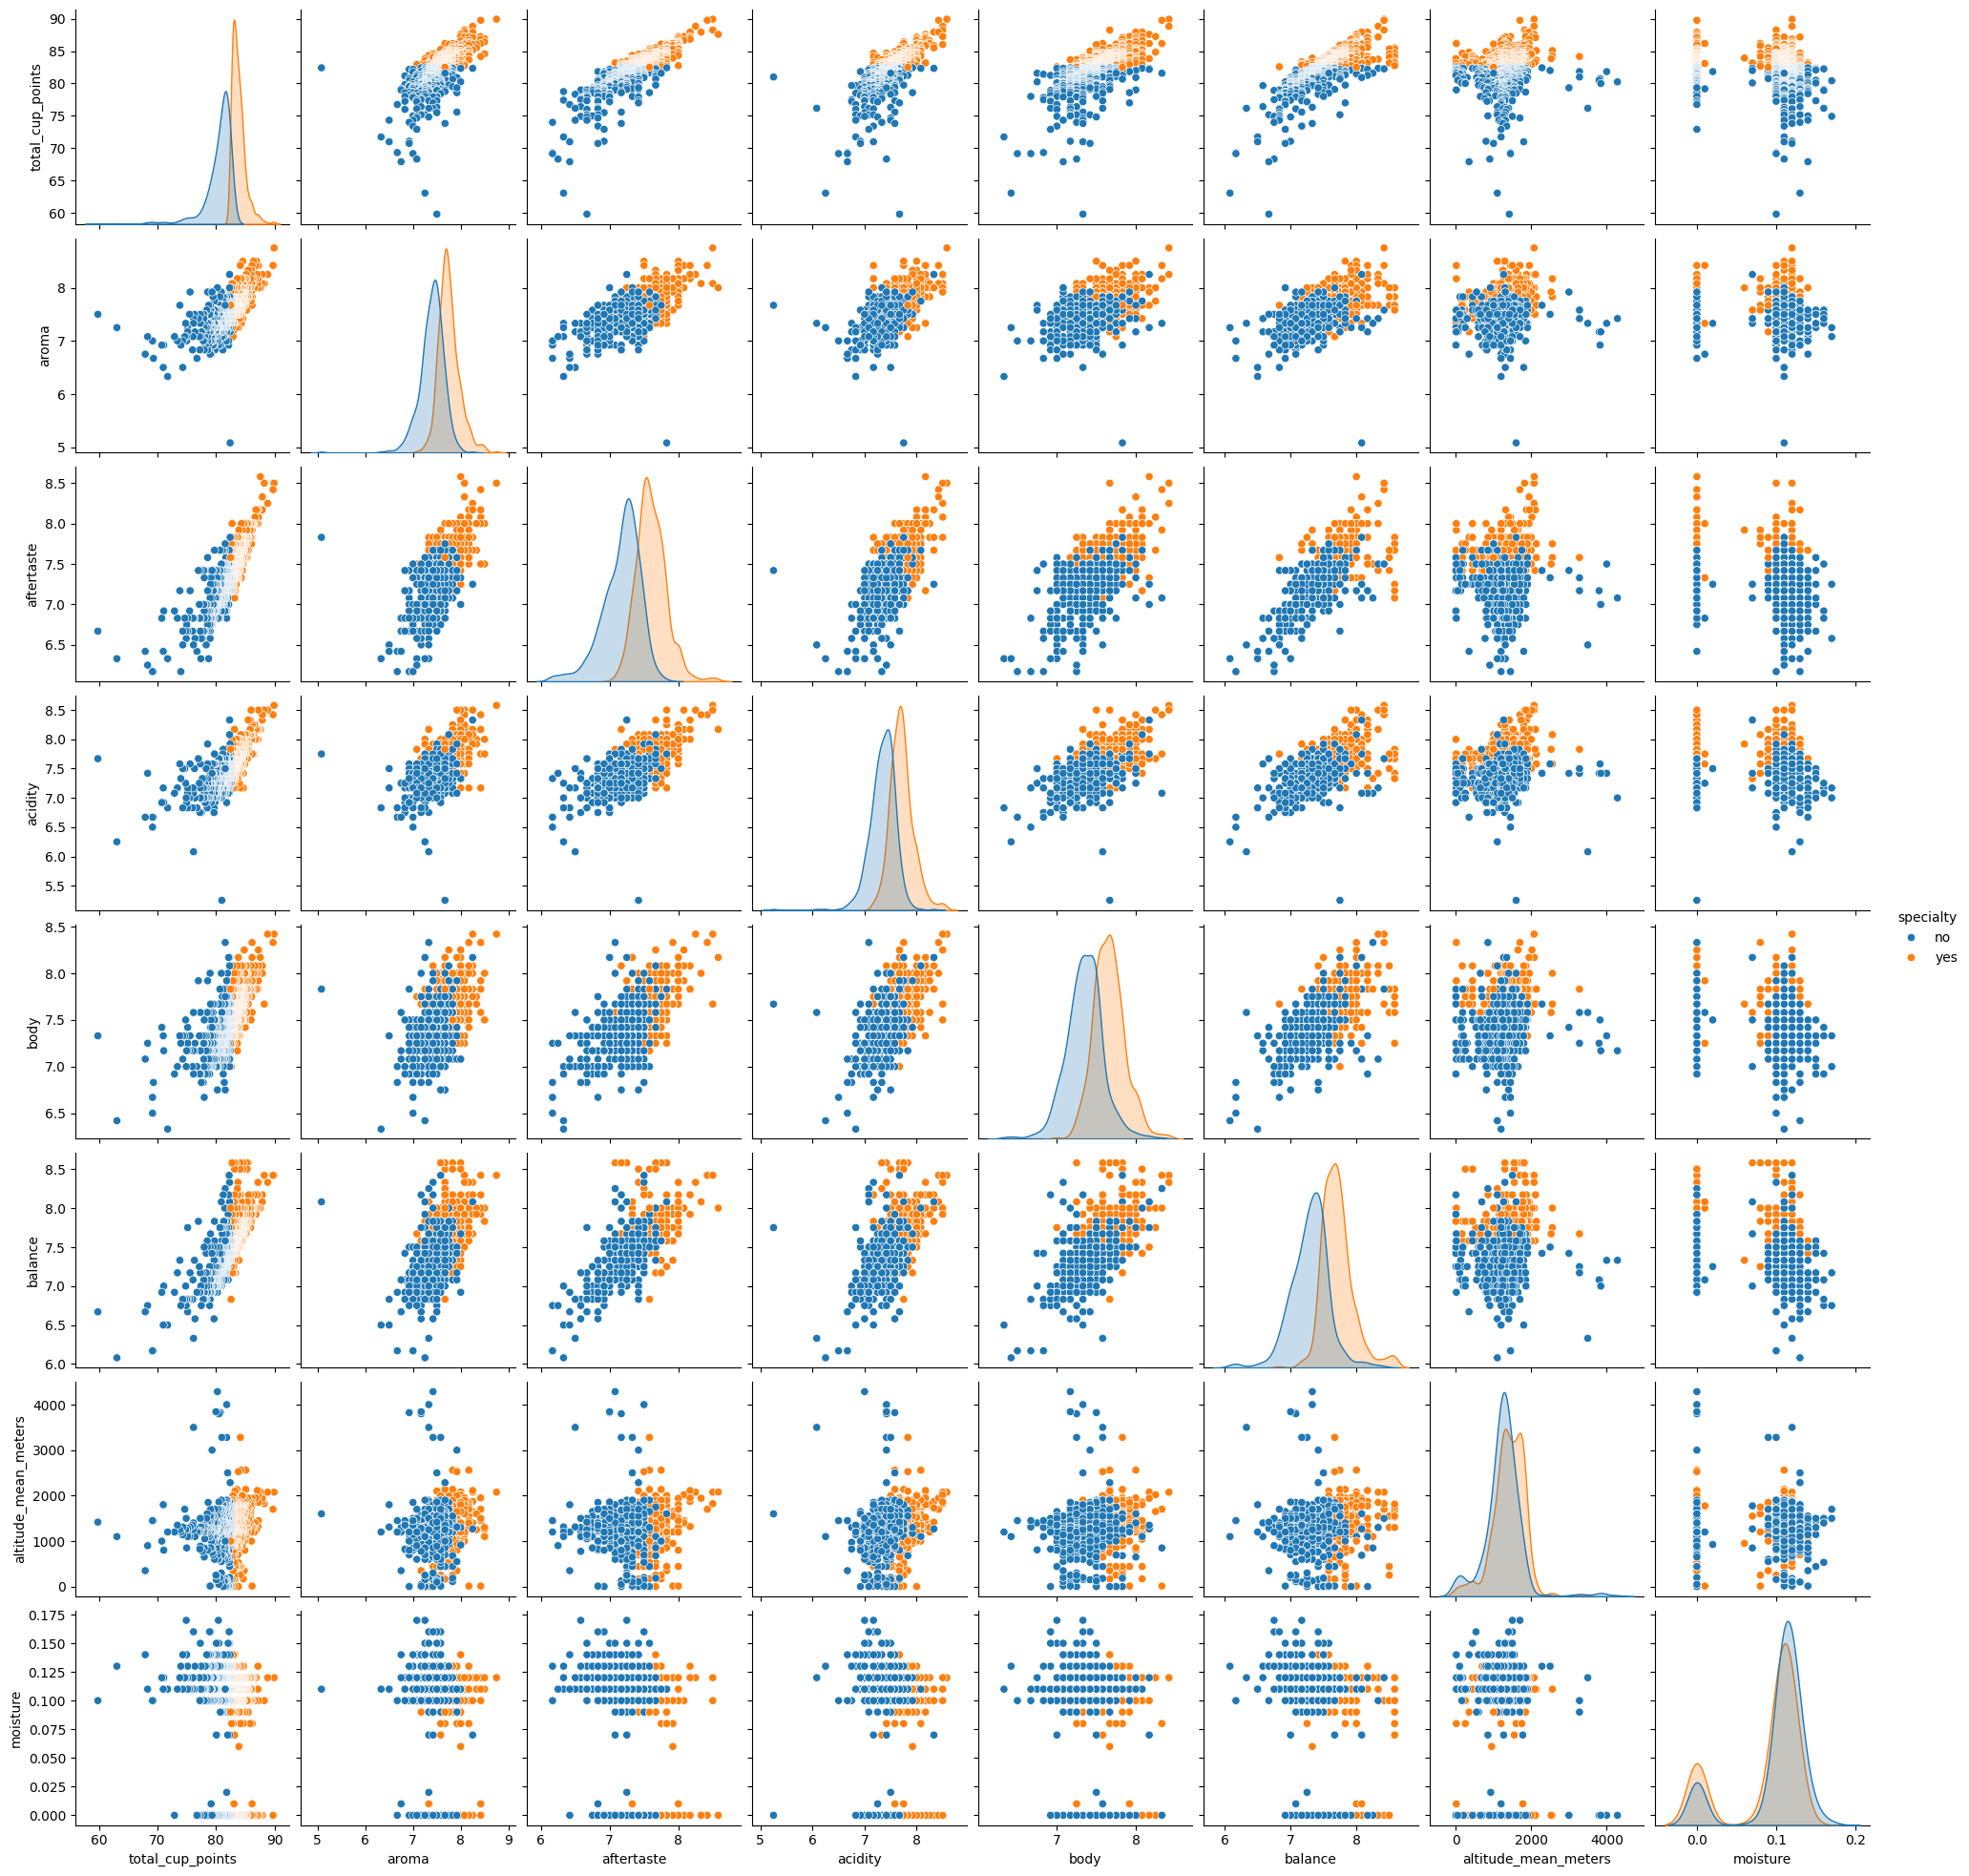

In [31]:
sns.pairplot(data=df_ch.drop(["species", "country_of_origin", "variety"], axis=1), hue="specialty")
plt.show()

In [16]:
df_ch.drop(["species", "country_of_origin", "variety"], axis=1)

,total_cup_points,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty
1,89.92,8.75,8.50,8.58,8.42,8.42,10.00,2075.00,0.12,yes
2,89.75,8.42,8.42,8.42,8.33,8.42,10.00,1700.00,0.00,yes
4,88.83,8.25,8.25,8.50,8.42,8.33,10.00,2075.00,0.12,yes
9,88.25,8.08,8.50,8.50,7.67,8.42,10.00,1822.50,0.10,yes
11,87.92,8.25,8.17,8.33,8.08,8.17,10.00,1872.00,0.00,yes
...,...,...,...,...,...,...,...,...,...,...
1309,59.83,7.50,6.67,7.67,7.33,6.67,1.33,1417.32,0.10,no
1310,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1400.00,0.12,no
1319,82.50,7.67,7.58,7.83,7.83,8.00,7.92,1000.00,0.09,yes
1322,81.58,7.67,7.75,7.50,7.75,7.58,7.75,1000.00,0.11,no


In [16]:
df_ch.drop(["species", "country_of_origin", "variety"], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
total_cup_points,996.0,82.108434,2.616641,59.83,81.17,82.42,83.58,89.92
aroma,996.0,7.566466,0.301464,5.08,7.42,7.58,7.75,8.75
aftertaste,996.0,7.383805,0.329743,6.17,7.17,7.42,7.58,8.58
acidity,996.0,7.522199,0.302425,5.25,7.33,7.50,7.67,8.58
body,996.0,7.503896,0.270046,6.33,7.33,7.50,7.67,8.42
balance,996.0,7.499277,0.339359,6.08,7.33,7.50,7.67,8.58
sweetness,996.0,9.924869,0.441238,1.33,10.00,10.00,10.00,10.00
altitude_mean_meters,996.0,1323.745876,470.946889,1.00,1100.00,1310.64,1600.00,4287.00
moisture,996.0,0.093785,0.044340,0.00,0.10,0.11,0.12,0.17


In [18]:
df_ch.drop(["species", "country_of_origin", "variety"], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
total_cup_points,997.0,82.026078,3.688091,0.0,81.17,82.42,83.58,89.92
aroma,997.0,7.558877,0.384985,0.0,7.42,7.58,7.75,8.75
aftertaste,997.0,7.376399,0.404112,0.0,7.17,7.42,7.58,8.58
acidity,997.0,7.514654,0.384867,0.0,7.33,7.50,7.67,8.58
body,997.0,7.496369,0.359624,0.0,7.33,7.50,7.67,8.42
balance,997.0,7.491755,0.414074,0.0,7.33,7.50,7.67,8.58
sweetness,997.0,9.914915,0.541567,0.0,10.00,10.00,10.00,10.00
altitude_mean_meters,997.0,1323.822360,470.716605,1.0,1100.00,1310.64,1600.00,4287.00
moisture,997.0,0.093811,0.044326,0.0,0.10,0.11,0.12,0.17


In [ ]:
# Detectar que fila tiene un cero
df_ch[df_ch["body"] == 0]


,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture,specialty
1310,0.0,Arabica,Honduras,Caturra,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,0.12,no


In [9]:
df_ch = df_ch.loc[:, (df_ch != 0).all(axis=0)].dropna(axis=1)

In [11]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 1 to 1333
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   species               997 non-null    category
 1   country_of_origin     997 non-null    category
 2   variety               997 non-null    category
 3   altitude_mean_meters  997 non-null    float64 
 4   specialty             997 non-null    category
dtypes: category(4), float64(1)
memory usage: 22.3 KB


In [35]:
df = df_ch.copy()
df_train, df_test = train_test_split(df, test_size= 0.2, random_state= 2024, stratify=df['specialty'])

NameError: name 'train_test_split' is not defined

In [ ]:
display(df_train.describe(include= 'number').T)
display(df_train.describe(include= 'category').T)

In [ ]:
df_train.hist(figsize= (8, 8))
plt.show()

In [ ]:
df_train.select_dtypes('number').corr()

In [ ]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin= -1, vmax= 1, annot= True, cmap="RdBu")
plt.show()